
# ========================
# AIDA'S PART
# ========================

In [2]:
# 📦 Load and Merge Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

mens_perfume_df = pd.read_csv('ebay_mens_perfume.csv')
womens_perfume_df = pd.read_csv('ebay_womens_perfume.csv')

mens_perfume_df.dropna(subset=['title', 'brand', 'type'], inplace=True)
womens_perfume_df.dropna(subset=['title', 'brand', 'type'], inplace=True)

mens_perfume_df['available'].fillna(0, inplace=True)
mens_perfume_df['sold'].fillna(0, inplace=True)

womens_perfume_df['available'].fillna(0, inplace=True)
womens_perfume_df['sold'].fillna(0, inplace=True)

mens_perfume_df.duplicated().sum()
womens_perfume_df.duplicated().sum()

mens_perfume_df["gender"] = "men"
womens_perfume_df["gender"] = "women"

perfume_df = pd.concat([mens_perfume_df, womens_perfume_df], ignore_index=True)

perfume_df["sold"] = pd.to_numeric(perfume_df["sold"], errors='coerce')
perfume_df["price"] = pd.to_numeric(perfume_df["price"], errors='coerce')
perfume_df["available"] = pd.to_numeric(perfume_df["available"], errors='coerce')

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_7793/1065598089.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mens_perfume_df['available'].fillna(0, inplace=True)
/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_7793/1065598089.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [3]:
# Save cleaned men's perfume data
mens_perfume_df.to_csv('cleaned_mens_perfume.csv', index=False)

# Save cleaned women's perfume data
womens_perfume_df.to_csv('cleaned_womens_perfume.csv', index=False)

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_7793/3977616570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='title', x='sold', palette='magma')


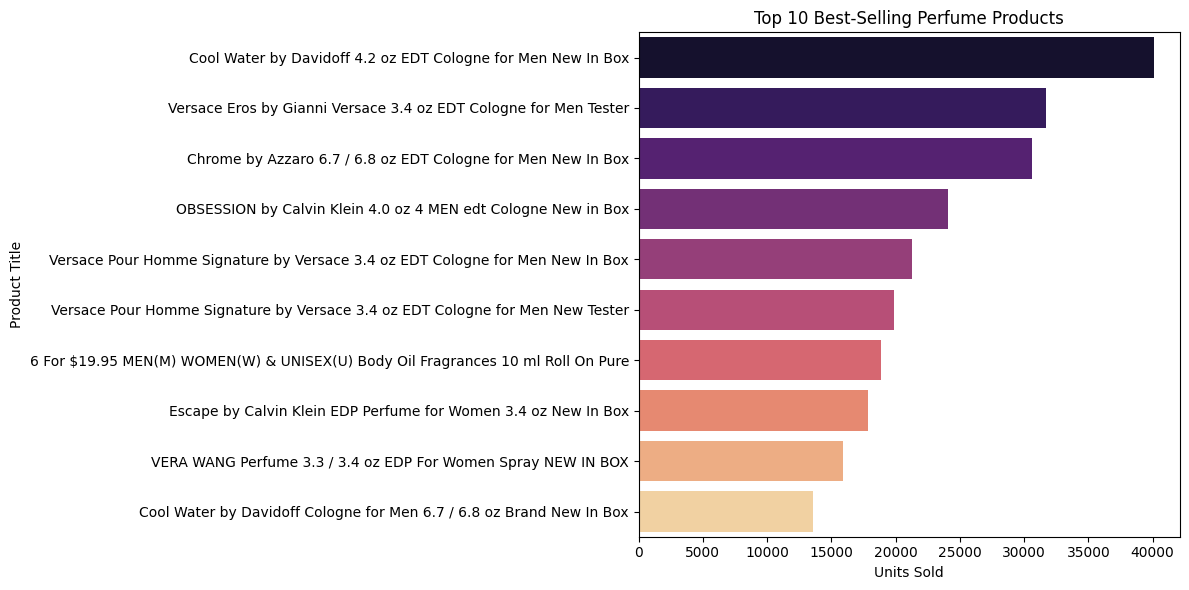

Total sales of men's perfumes: 704481.0
Total sales of women's perfumes: 489343.0


In [4]:
# 📊 1. Top 10 Best-Selling Products
plt.figure(figsize=(12, 6))
top_products = perfume_df[['title', 'sold']].sort_values(by='sold', ascending=False).head(10)
sns.barplot(data=top_products, y='title', x='sold', palette='magma')
plt.title("Top 10 Best-Selling Perfume Products")
plt.xlabel("Units Sold")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

# Compare total sales
total_sales_men = mens_perfume_df['sold'].sum()
total_sales_women = womens_perfume_df['sold'].sum()
print(f"Total sales of men's perfumes: {total_sales_men}")
print(f"Total sales of women's perfumes: {total_sales_women}")

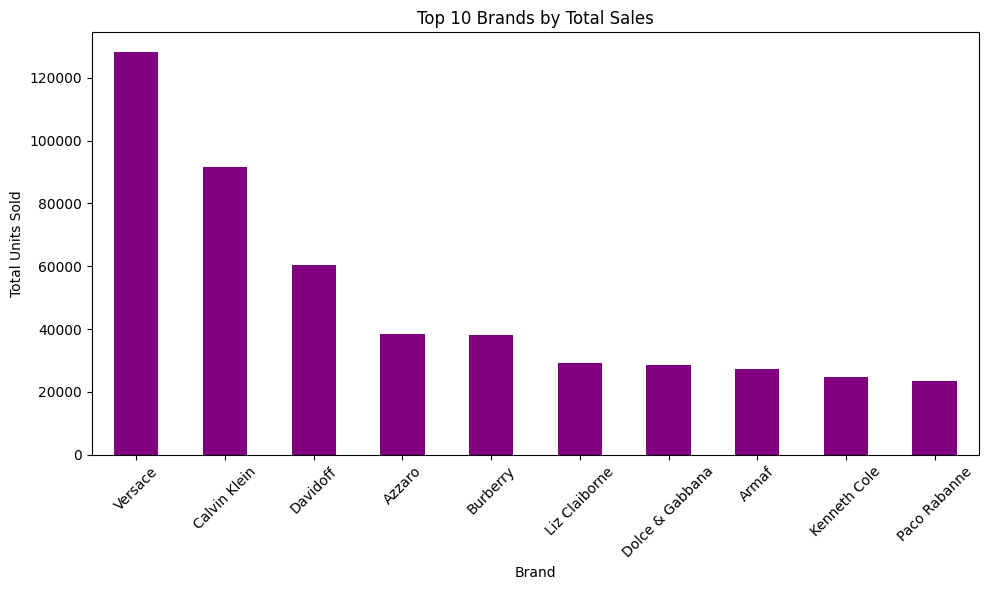

Number of unique brands in men's perfumes: 246
Number of unique brands in women's perfumes: 247


brand
Versace          96519.0
Davidoff         54944.0
Calvin Klein     43520.0
Azzaro           38305.0
Armaf            24282.0
Kenneth Cole     23716.0
Paco Rabanne     21579.0
Liz Claiborne    21341.0
Burberry         19286.0
2nd To None      18882.0
Name: sold, dtype: float64

In [5]:
# 🏷️ 2. Top 10 Brands by Sales
plt.figure(figsize=(10, 6))
top_brands = perfume_df.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', title="Top 10 Brands by Total Sales", color='purple')
plt.xlabel("Brand")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Compare brand representation
mens_brands = mens_perfume_df['brand'].nunique()
womens_brands = womens_perfume_df['brand'].nunique()
print(f"Number of unique brands in men's perfumes: {mens_brands}")
print(f"Number of unique brands in women's perfumes: {womens_brands}")

mens_perfume_df.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)


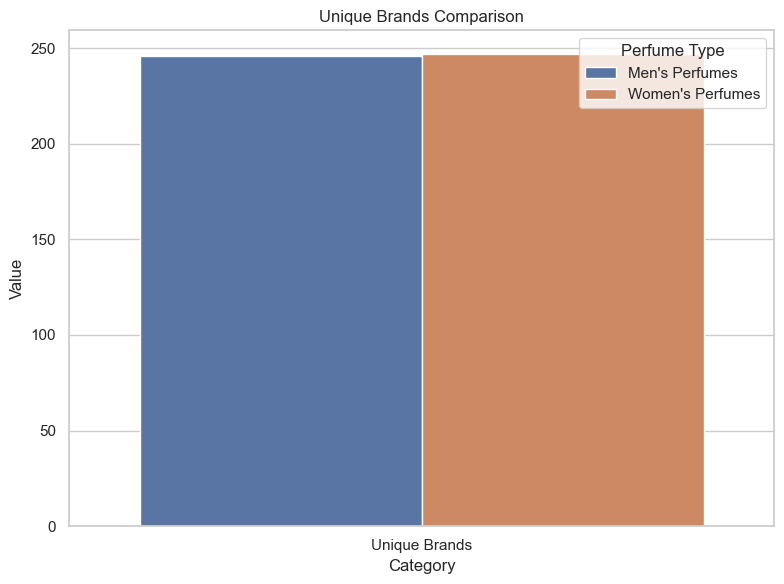

In [6]:
# 2.2 compare unique brands for men and women
comparison_data = {
    'Category': ['Unique Brands'],
    "Men's Perfumes": [mens_brands],
    "Women's Perfumes": [womens_brands]
}

comparison_df = pd.DataFrame(comparison_data)

# Melt the dataframe for easier plotting with seaborn
melted_comparison_df = comparison_df.melt(id_vars='Category', var_name='Perfume Type', value_name='Value')

# Plot the unique brands comparison
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Value', hue='Perfume Type', data=melted_comparison_df)
plt.title('Unique Brands Comparison')
plt.ylabel('Value')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

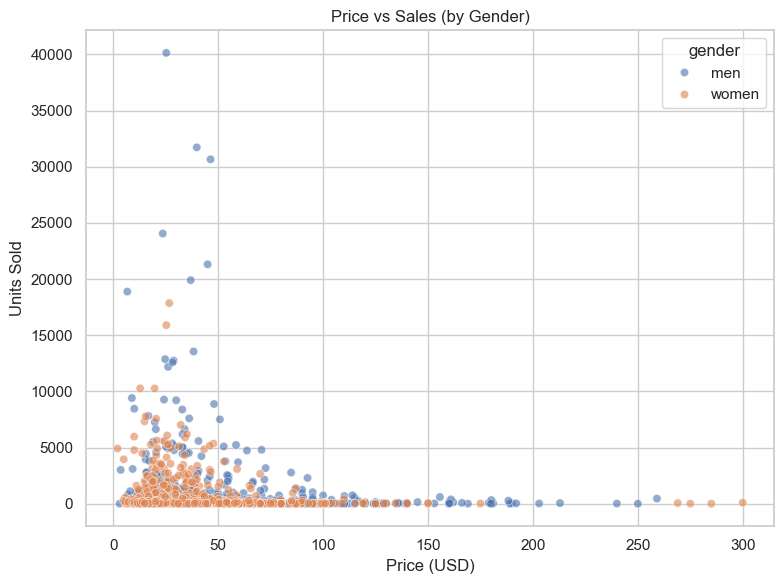

In [7]:
# 💸 3. Price vs Sales (by Gender)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=perfume_df, x='price', y='sold', hue='gender', alpha=0.6)
plt.title("Price vs Sales (by Gender)")
plt.xlabel("Price (USD)")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

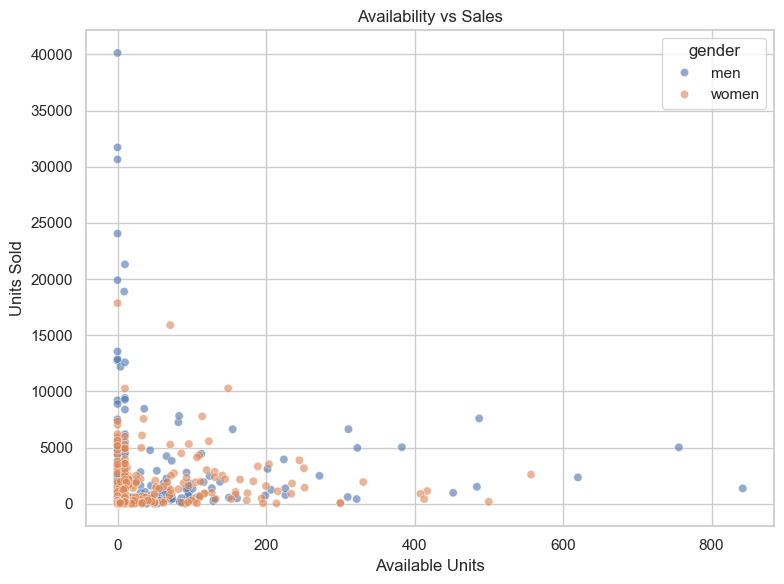

In [8]:

# 📦 4. Availability vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=perfume_df, x='available', y='sold', hue='gender', alpha=0.6)
plt.title("Availability vs Sales")
plt.xlabel("Available Units")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_7793/1840942102.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_sales = perfume_df.groupby('price_range')['sold'].sum().reset_index()
/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_7793/1840942102.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_range_sales, x='price_range', y='sold', palette='magma')


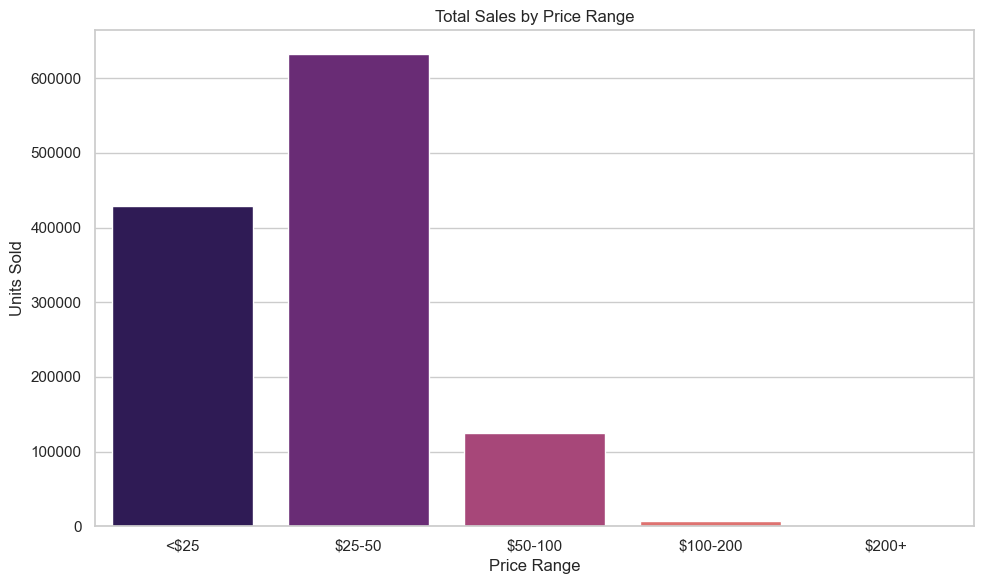

In [9]:
# 💵 5. Sales by Price Range
bins = [0, 25, 50, 100, 200, 1000]
labels = ['<$25', '$25-50', '$50-100', '$100-200', '$200+']
perfume_df['price_range'] = pd.cut(perfume_df['price'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
price_range_sales = perfume_df.groupby('price_range')['sold'].sum().reset_index()
sns.barplot(data=price_range_sales, x='price_range', y='sold', palette='magma')
plt.title("Total Sales by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


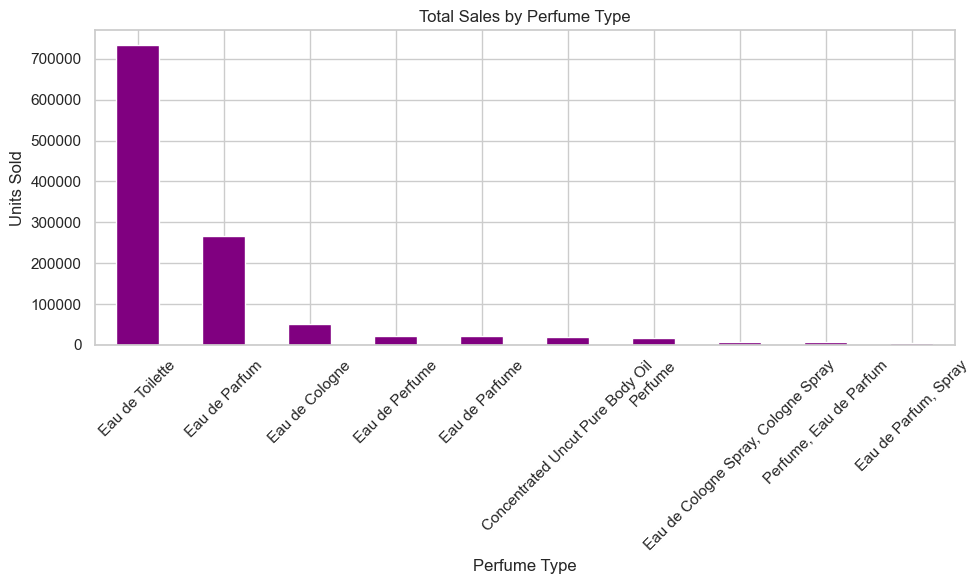

Perfume Types by Sales:
type
Eau de Toilette                        733114.0
Eau de Parfum                          265615.0
Eau de Cologne                          51536.0
Eau de Perfume                          22917.0
Eau de Parfume                          21211.0
Concentrated Uncut Pure Body Oil        18882.0
Perfume                                 15989.0
Eau de Cologne Spray, Cologne Spray      6634.0
Perfume, Eau de Parfum                   6216.0
Eau de Parfum, Spray                     5901.0
Name: sold, dtype: float64


In [10]:
# 🧴 6. Sales by Perfume Type
plt.figure(figsize=(10, 6))
type_sales = perfume_df.groupby('type')['sold'].sum().sort_values(ascending=False).head(10)
type_sales.plot(kind='bar', title="Total Sales by Perfume Type", color='purple')
plt.xlabel("Perfume Type")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Display the perfume types by sales
print("Perfume Types by Sales:")
print(type_sales)

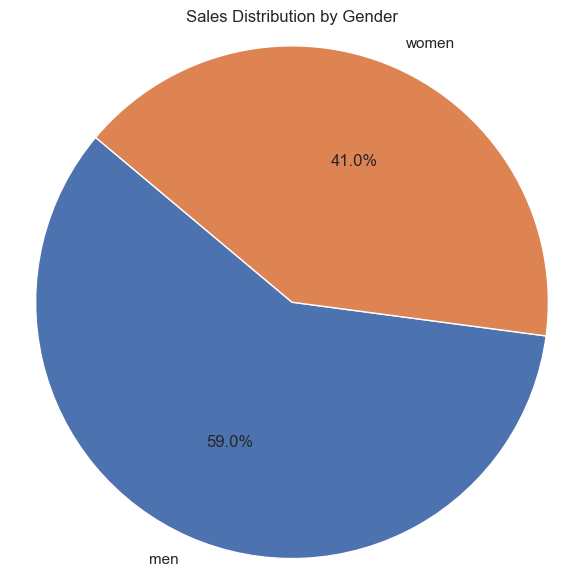

NameError: name 'avg_price_men' is not defined

In [11]:
# 🚻 7. Sales Distribution by Gender
plt.figure(figsize=(6, 6))
gender_sales = perfume_df.groupby('gender')['sold'].sum().reset_index()
plt.pie(gender_sales['sold'], labels=gender_sales['gender'], autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Gender")
plt.axis('equal')
plt.tight_layout()
plt.show()

comparison_data = {
    'Category': ['Average Price'],
    "Men's Perfumes": [avg_price_men],
    "Women's Perfumes": [avg_price_women]
}

comparison_df = pd.DataFrame(comparison_data)

# Melt the dataframe for easier plotting with seaborn
melted_comparison_df = comparison_df.melt(id_vars='Category', var_name='Perfume Type', value_name='Value')

# Plot: Average Prices Comparison
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Value', hue='Perfume Type', data=melted_comparison_df,palette='RdPu')
plt.title('Average Prices Comparison')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
# Create data for total sales comparison
total_sales_data = {
    'Perfume Type': ["Men's Perfumes", "Women's Perfumes"],
    'Total Sales': [total_sales_men, total_sales_women]
}
total_sales_df = pd.DataFrame(total_sales_data)

# Plot: Total Sales Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Perfume Type', y='Total Sales', data=total_sales_df,palette='RdPu')
plt.title('Total Sales Comparison')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()
avg_price_men = mens_perfume_df['price'].mean()
avg_price_women = womens_perfume_df['price'].mean()
print(f"Average price of men's perfumes: ${avg_price_men:.2f}")
print(f"Average price of women's perfumes: ${avg_price_women:.2f}")

Top 10 Brands by Sales:
               Brand  Total Sales  Average Price
372          Versace     128077.0      36.890755
74      Calvin Klein      91620.0      24.896061
101         Davidoff      60289.0      24.415455
44            Azzaro      38305.0      42.802000
64          Burberry      38001.0      40.329091
233    Liz Claiborne      29170.0      23.651818
106  Dolce & Gabbana      28570.0      39.268696
32             Armaf      27120.0      39.587143
212     Kenneth Cole      24636.0      22.441250
293     Paco Rabanne      23506.0      59.397234


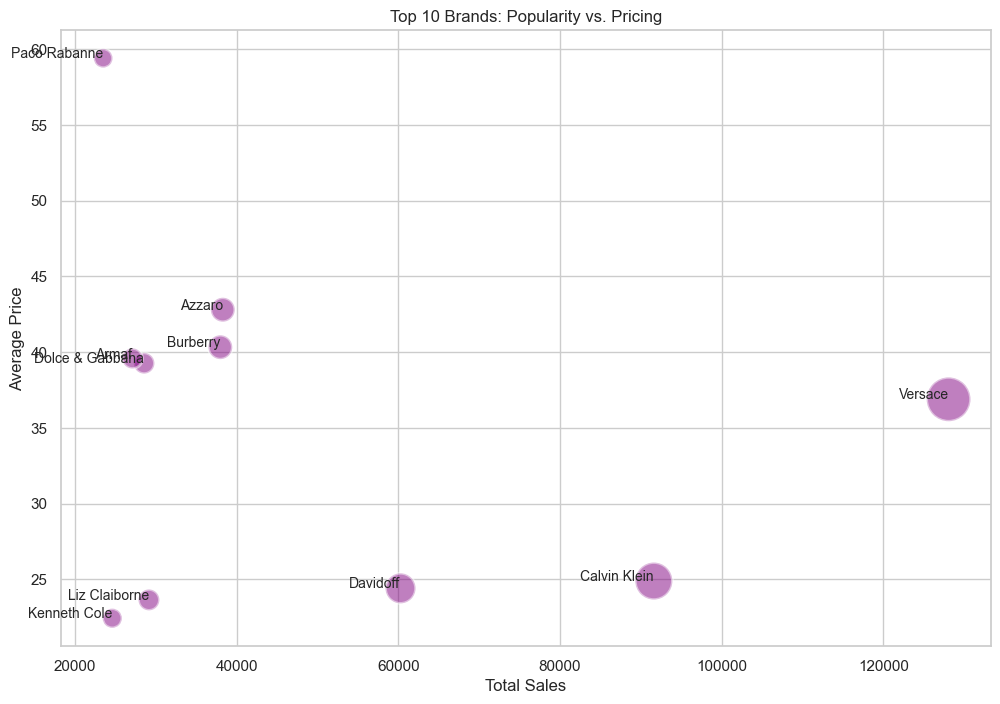

In [ ]:
#  8. popularity vs pricing
# Combine men's and women's perfume datasets
perfume_df = pd.concat([mens_perfume_df, womens_perfume_df])

# Calculate sales and average price for each brand
brand_sales = perfume_df.groupby('brand')['sold'].sum().reset_index()
brand_avg_price = perfume_df.groupby('brand')['price'].mean().reset_index()

# Merge sales and average price data
brand_analysis_df = pd.merge(brand_sales, brand_avg_price, on='brand')
brand_analysis_df.columns = ['Brand', 'Total Sales', 'Average Price']

# Sort brands by total sales in descending order
brand_analysis_df = brand_analysis_df.sort_values('Total Sales', ascending=False)

# Display the top 10 brands by sales
top_brands = brand_analysis_df.head(10)
print("Top 10 Brands by Sales:")
print(top_brands)

# Visualize the relationship between brand popularity and pricing with a bubble chart
plt.figure(figsize=(12, 8))
bubble_size = top_brands['Total Sales'] / top_brands['Total Sales'].max() * 1000  # Adjust bubble size for visibility

plt.scatter(top_brands['Total Sales'], top_brands['Average Price'], s=bubble_size, alpha=0.5, edgecolors="w", linewidth=2,color='purple')

# Add labels to each bubble
for i in range(len(top_brands)):
    plt.text(top_brands['Total Sales'].iloc[i], top_brands['Average Price'].iloc[i], top_brands['Brand'].iloc[i], fontsize=10, ha='right')

plt.xlabel('Total Sales')
plt.ylabel('Average Price')
plt.title('Top 10 Brands: Popularity vs. Pricing')
plt.grid(True)
plt.show()


In [ ]:
# 9.Geographical Distribution of Perfume Sales
import plotly.express as px

# Extract country from itemLocation
perfume_df['Country'] = perfume_df['itemLocation'].str.split(',').str[-1].str.strip()

# Manual fixes to standardize country names
country_corrections = {
    'USA': 'United States',
    'U.S.A.': 'United States',
    'US': 'United States',
    'U.S.': 'United States',
    'United States of America': 'United States',
    'Hong Kong': 'Hong Kong',
    'New Jersey': 'United States',
    'Canada': 'Canada',
    'China': 'China'
    # Add more if needed based on unique values
}

perfume_df['Country'] = perfume_df['Country'].replace(country_corrections)

# Group by country and calculate total sales
country_sales = perfume_df.groupby('Country')['sold'].sum().reset_index()

# Sort countries by total sales
country_sales = country_sales.sort_values('sold', ascending=False)

# Preview cleaned countries
print("Countries found:\n", country_sales['Country'].unique())

# Create the choropleth map
fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names',
    color='sold',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Geographical Distribution of Perfume Sales'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()



Countries found:
 ['United States' 'Hong Kong' 'China' 'Canada' 'India' 'Taiwan' 'Brazil'
 'Bulgaria' 'Poland' 'Israel' 'Portugal' 'Japan' 'Pakistan']


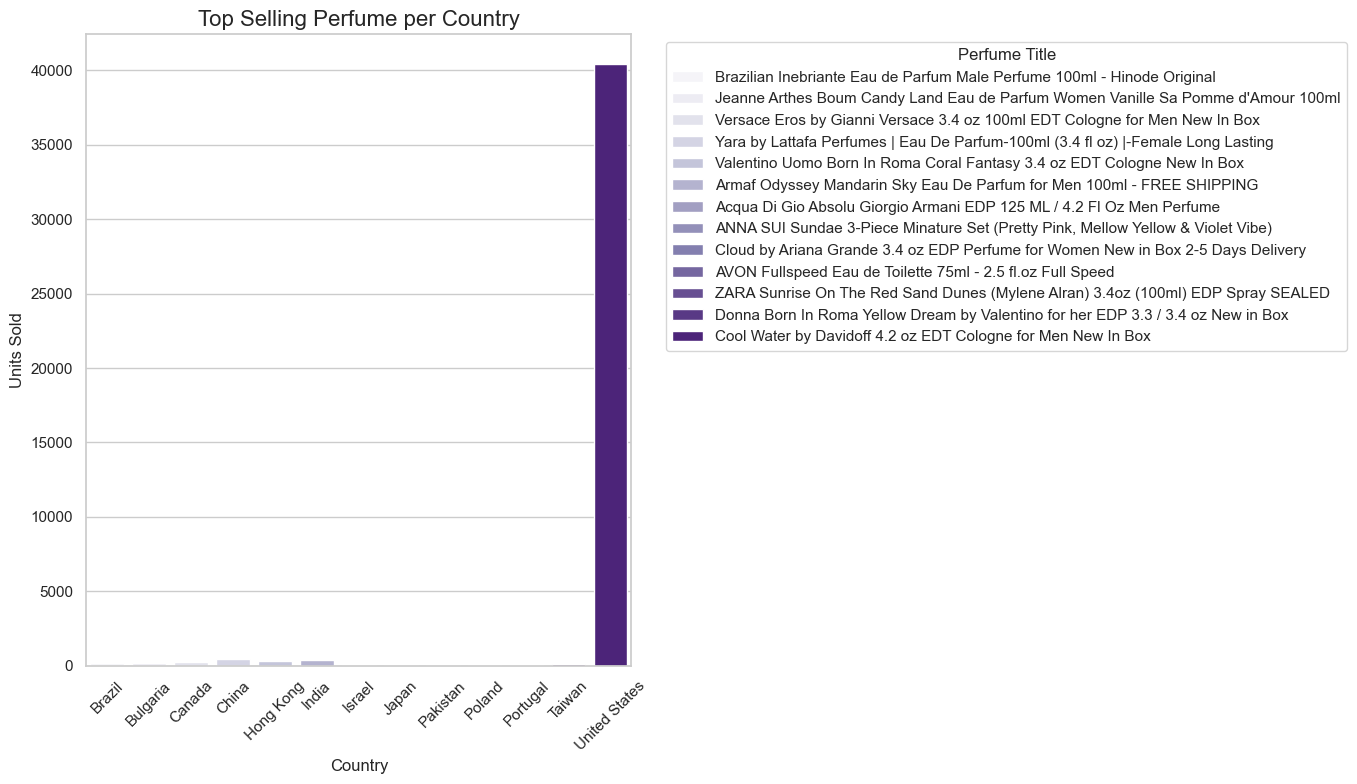

In [ ]:
# 11. top product per country
perfume_df['Country'] = perfume_df['itemLocation'].str.split(',').str[-1].str.strip()


country_corrections = {
    'USA': 'United States',
    'U.S.A.': 'United States',
    'US': 'United States',
    'U.S.': 'United States',
    'United States of America': 'United States',
    'New Jersey': 'United States',
    'Hong Kong': 'Hong Kong',
    'Canada': 'Canada',
    'China': 'China'
    # Add more if needed
}

perfume_df['Country'] = perfume_df['Country'].replace(country_corrections)


country_perfume_sales = (
    perfume_df.groupby(['Country', 'title'])['sold']
    .sum()
    .reset_index()
)


top_perfume_per_country = (
    country_perfume_sales
    .sort_values(['Country', 'sold'], ascending=[True, False])
    .groupby('Country')
    .first()
    .reset_index()
)


purple_palette = sns.color_palette("Purples", n_colors=top_perfume_per_country['title'].nunique())
title_palette_dict = {title: purple_palette[i] for i, title in enumerate(top_perfume_per_country['title'].unique())}


plt.figure(figsize=(14, 8))
sns.barplot(
    x='Country',
    y='sold',
    hue='title',
    data=top_perfume_per_country,
    dodge=False,
    palette=title_palette_dict
)

plt.title('Top Selling Perfume per Country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Perfume Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_21401/508671723.py:14: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



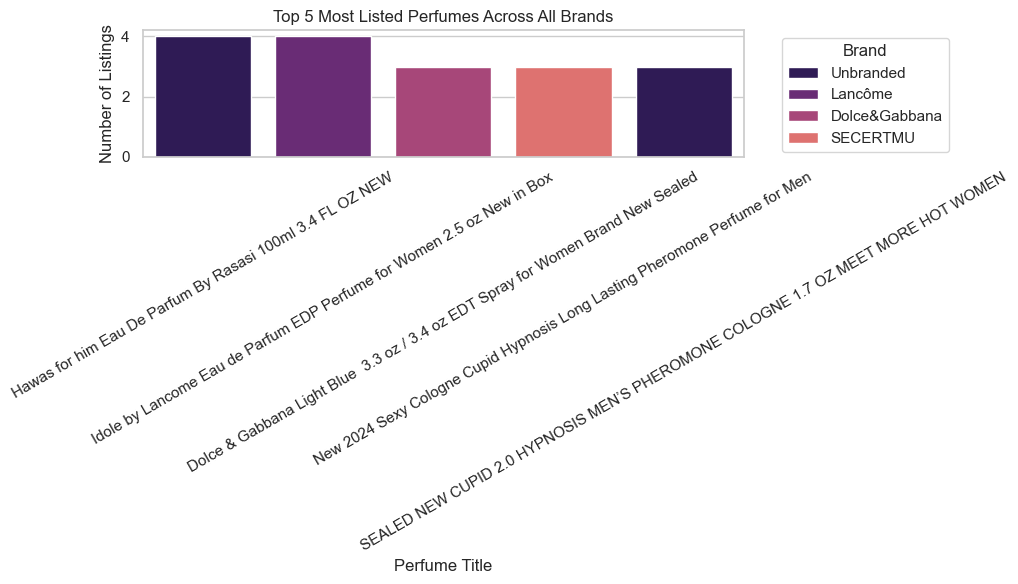

In [ ]:
# 12. perfumes listed per brand
# Step 1: Count the number of listings per brand-product combination
listing_counts = (
    perfume_df.groupby(['brand', 'title'])
    .size()
    .reset_index(name='listing_count')
)

# Step 2: Sort and select top 5
top_5_listed_products = listing_counts.sort_values(by='listing_count', ascending=False).head(5)

# Step 3: Plot with purple colors
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_listed_products,
    x='title',
    y='listing_count',
    hue='brand',
    dodge=False,
    palette=sns.color_palette("magma", n_colors=5)
)
plt.title('Top 5 Most Listed Perfumes Across All Brands')
plt.xlabel('Perfume Title')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



<Axes: >

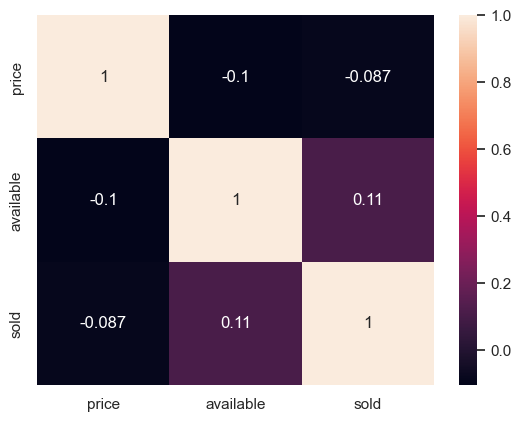

In [ ]:
#13.heatmap for price vs avilablity vs sold
sns.heatmap(mens_perfume_df[['price', 'available', 'sold']].corr(), annot=True)



# ========================
# MEN'S PERFUME ANALYSIS
# ========================

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_21401/195969451.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




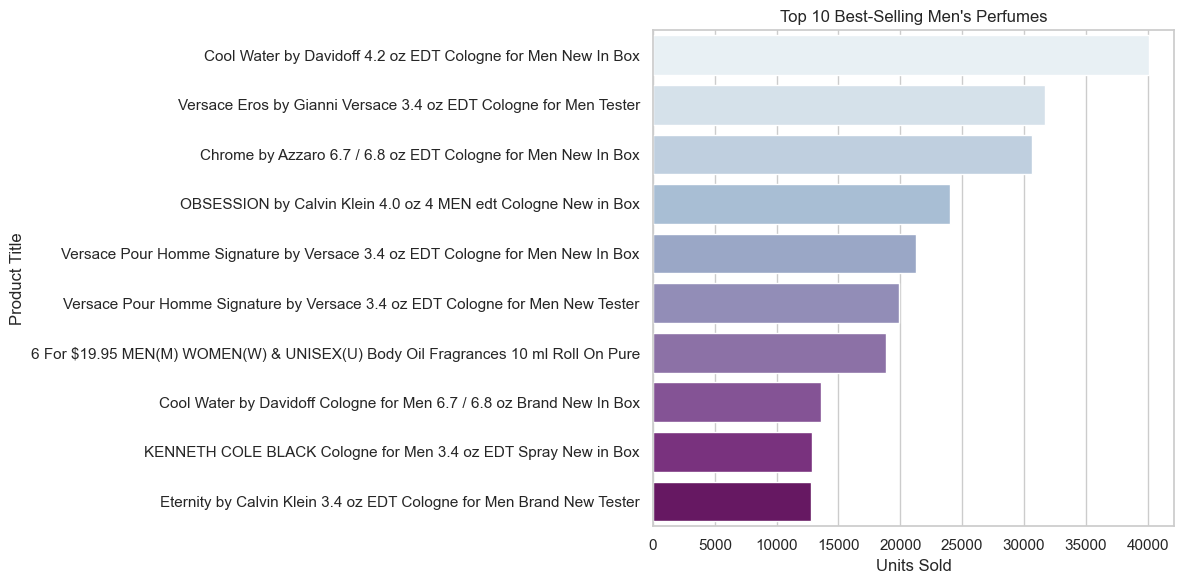

Total sales of men's perfumes: 704481.0


In [ ]:
# 📊 1. Top-Selling Products (Men)
plt.figure(figsize=(12, 6))
top_men_products = mens_perfume_df[['title', 'sold']].sort_values(by='sold', ascending=False).head(10)
sns.barplot(data=top_men_products, y='title', x='sold', palette='BuPu')
plt.title("Top 10 Best-Selling Men's Perfumes")
plt.xlabel("Units Sold")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()
total_sales_men = mens_perfume_df['sold'].sum()
print(f"Total sales of men's perfumes: {total_sales_men}")

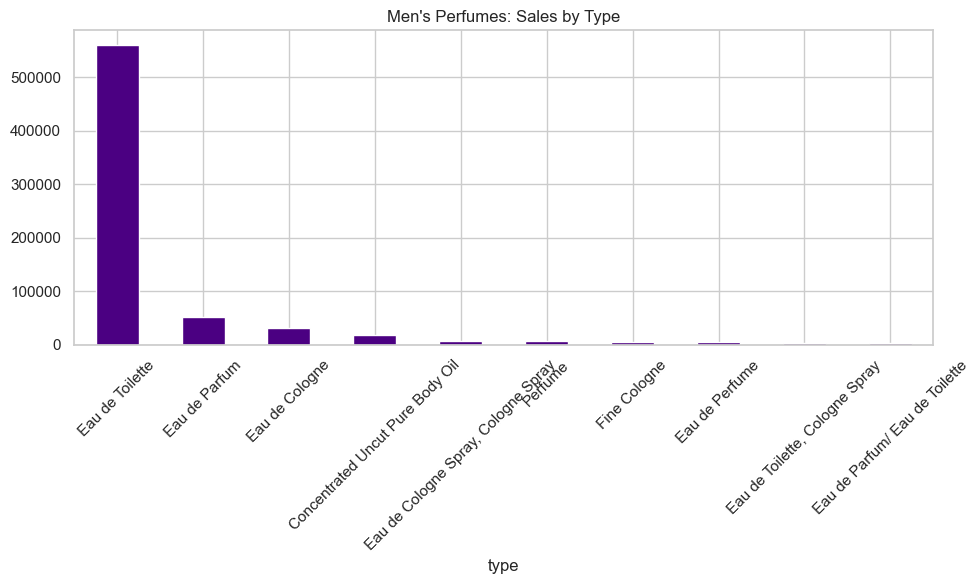

In [ ]:

# 🧴 7. Sales by Perfume Type
plt.figure(figsize=(10, 6))
type_sales_men = mens_perfume_df.groupby('type')['sold'].sum().sort_values(ascending=False).head(10)
type_sales_men.plot(kind='bar', title="Men's Perfumes: Sales by Type", color='indigo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

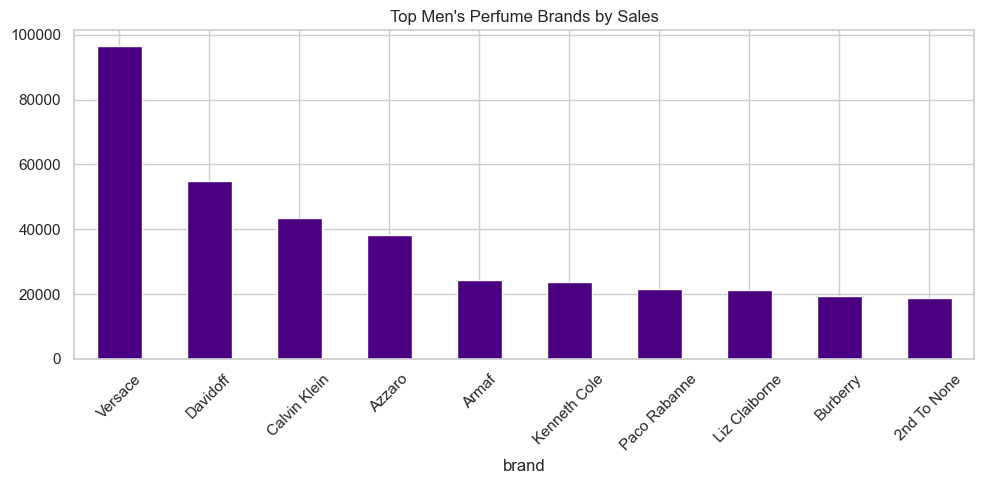

Number of unique brands in men's perfumes: 246


In [ ]:

# 🏷️ Top Brands (Men)
plt.figure(figsize=(10, 5))
top_men_brands = mens_perfume_df.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)
top_men_brands.plot(kind='bar', title="Top Men's Perfume Brands by Sales", color='indigo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
mens_brands = mens_perfume_df['brand'].nunique()
print(f"Number of unique brands in men's perfumes: {mens_brands}")



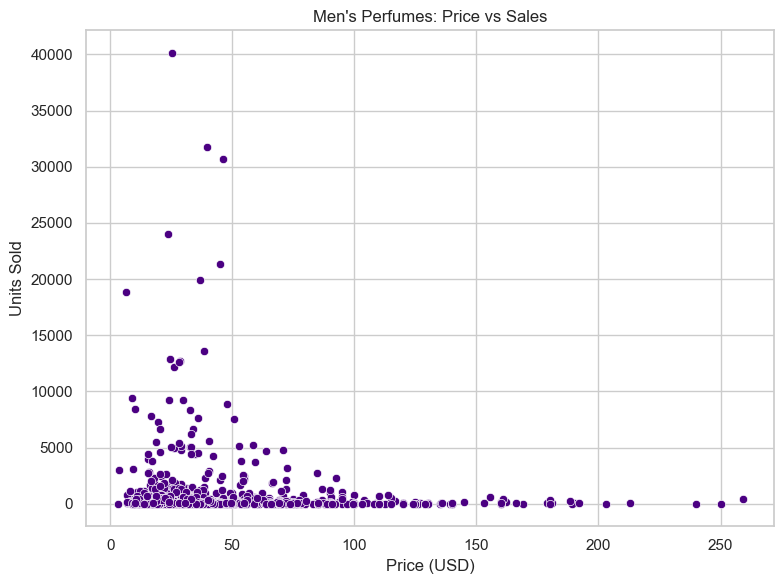

In [ ]:
# 💸 Price vs Sales (Men)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mens_perfume_df, x='price', y='sold', color='indigo')
plt.title("Men's Perfumes: Price vs Sales")
plt.xlabel("Price (USD)")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

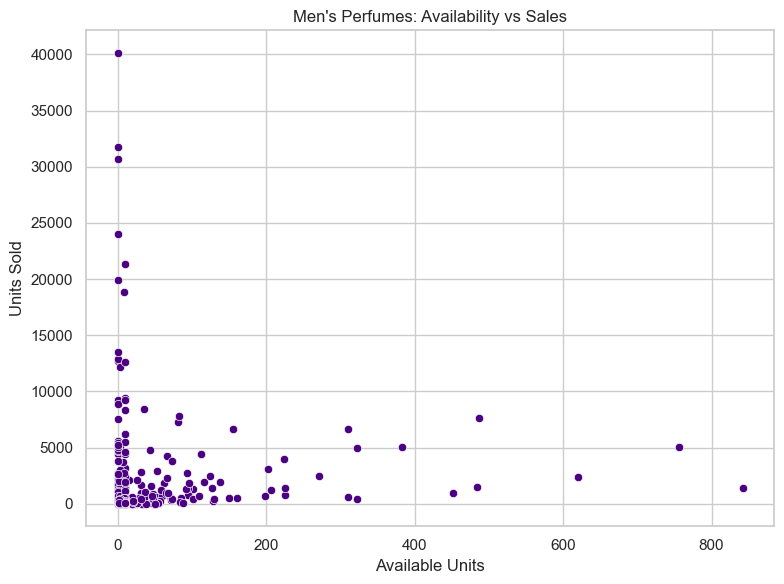

In [ ]:

# 📦 Availability vs Sales (Men)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mens_perfume_df, x='available', y='sold', color='indigo')
plt.title("Men's Perfumes: Availability vs Sales")
plt.xlabel("Available Units")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_21401/1961689850.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_21401/1961689850.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




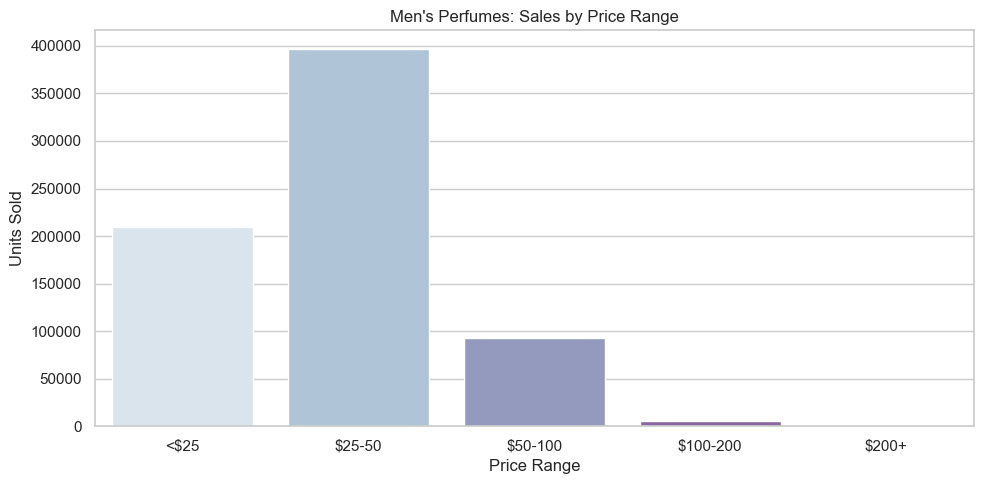

In [ ]:
# 💵 Sales by Price Range (Men)
bins = [0, 25, 50, 100, 200, 1000]
labels = ['<$25', '$25-50', '$50-100', '$100-200', '$200+']
mens_perfume_df['price_range'] = pd.cut(mens_perfume_df['price'], bins=bins, labels=labels)
mens_price_range = mens_perfume_df.groupby('price_range')['sold'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=mens_price_range, x='price_range', y='sold', palette='BuPu')
plt.title("Men's Perfumes: Sales by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

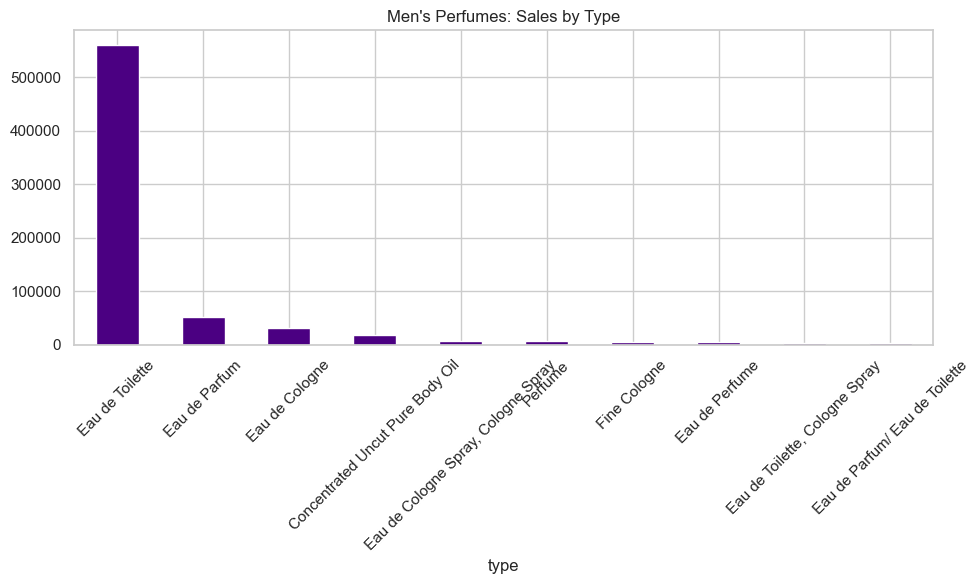

In [ ]:

# 🧴 Sales by Perfume Type (Men)
plt.figure(figsize=(10, 6))
type_sales_men = mens_perfume_df.groupby('type')['sold'].sum().sort_values(ascending=False).head(10)
type_sales_men.plot(kind='bar', title="Men's Perfumes: Sales by Type", color='indigo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#top locations (men)
men_location_counts = mens_perfume_df['itemLocation'].value_counts().head(10)
print("Top Locations for Men's Perfumes:")
print(men_location_counts)

Top Locations for Men's Perfumes:
itemLocation
Dallas, Texas, United States             126
Hackensack, New Jersey, United States    103
Brooklyn, New York, United States         76
Miami, Florida, United States             40
Edison, New Jersey, United States         35
Houston, Texas, United States             28
Katy, Texas, United States                25
Detroit, Michigan, United States          22
New York, New York, United States         21
Warren, Michigan, United States           14
Name: count, dtype: int64


# ===========================
# WOMEN'S PERFUME ANALYSIS
# ===========================

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_21401/1201546722.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




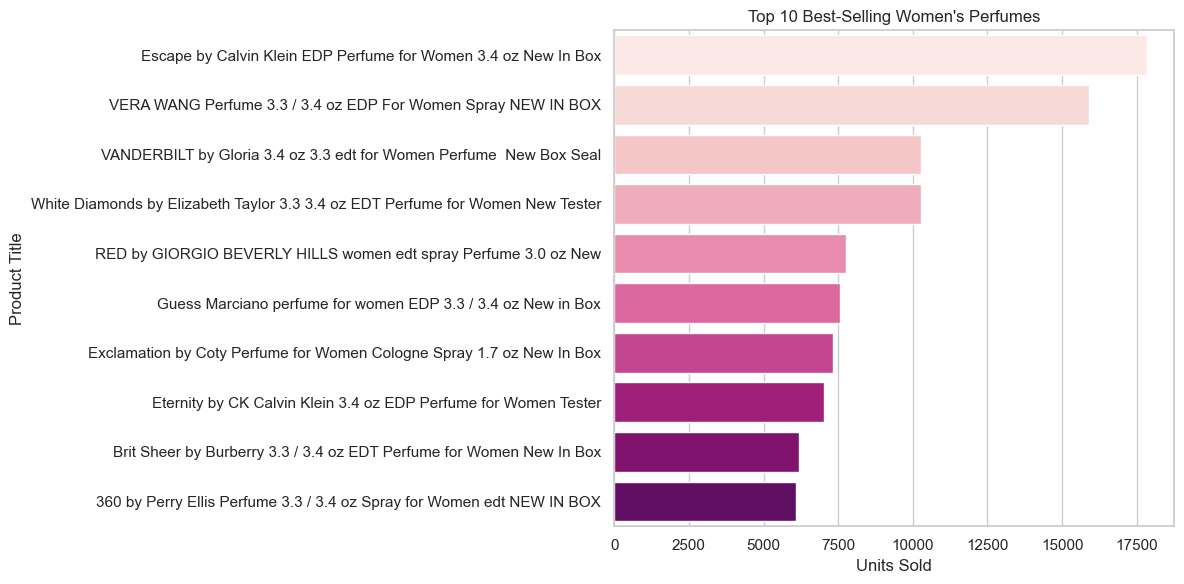

Total sales of women's perfumes: 489343.0


In [ ]:
# 📊 Top-Selling Products (Women)
plt.figure(figsize=(12, 6))
top_women_products = womens_perfume_df[['title', 'sold']].sort_values(by='sold', ascending=False).head(10)
sns.barplot(data=top_women_products, y='title', x='sold', palette='RdPu')
plt.title("Top 10 Best-Selling Women's Perfumes")
plt.xlabel("Units Sold")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()
total_sales_women = womens_perfume_df['sold'].sum()
print(f"Total sales of women's perfumes: {total_sales_women}")


In [ ]:
# Top locations (women)
women_location_counts = womens_perfume_df['itemLocation'].value_counts().head(10)
print("\nTop Locations for Women's Perfumes:")
print(women_location_counts)


Top Locations for Women's Perfumes:
itemLocation
Dallas, Texas, United States             141
Hackensack, New Jersey, United States     85
Brooklyn, New York, United States         35
Miami, Florida, United States             32
Edison, New Jersey, United States         26
Detroit, Michigan, United States          25
Las Vegas, Nevada, United States          23
New York, New York, United States         19
Houston, Texas, United States             19
Warren, Michigan, United States           18
Name: count, dtype: int64


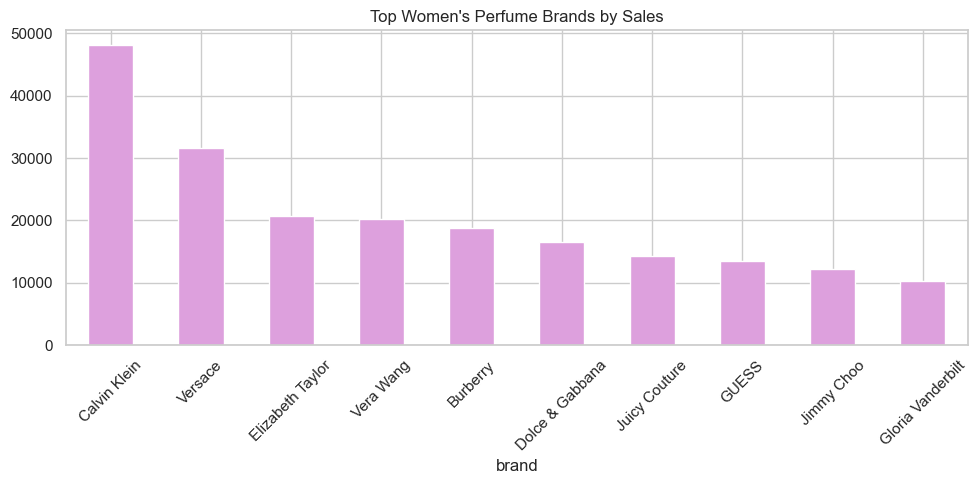

Number of unique brands in women's perfumes: 247


In [ ]:

# 🏷️ Top Brands (Women)
plt.figure(figsize=(10, 5))
top_women_brands = womens_perfume_df.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)
top_women_brands.plot(kind='bar', title="Top Women's Perfume Brands by Sales", color='plum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
womens_brands = womens_perfume_df['brand'].nunique()
print(f"Number of unique brands in women's perfumes: {womens_brands}")


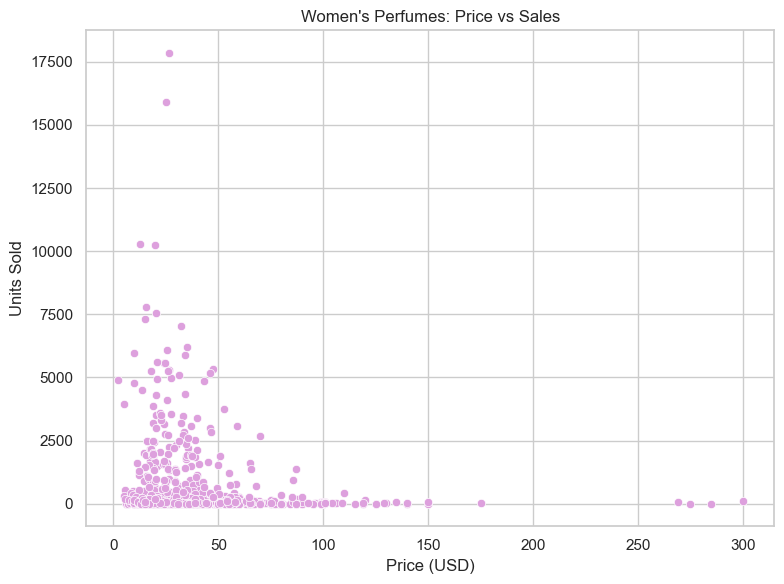

In [ ]:

# 💸 Price vs Sales (Women)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=womens_perfume_df, x='price', y='sold', color='plum')
plt.title("Women's Perfumes: Price vs Sales")
plt.xlabel("Price (USD)")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

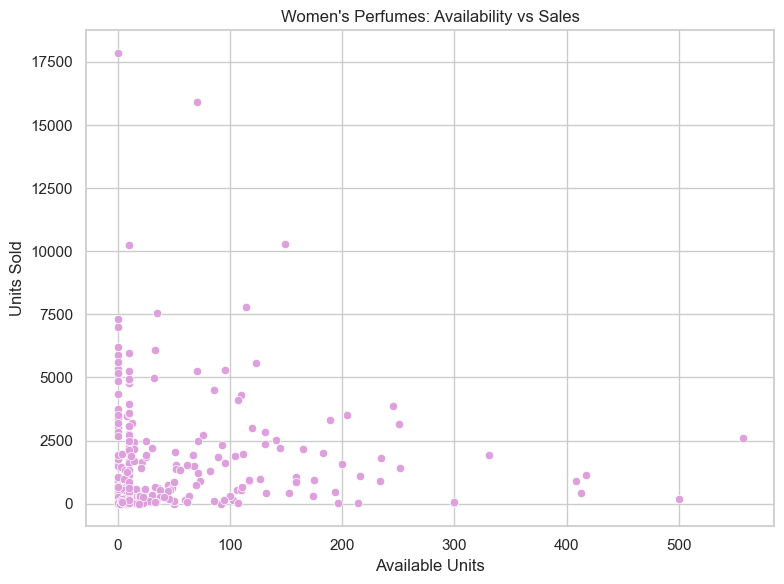

In [ ]:
# 📦 Availability vs Sales (Women)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=womens_perfume_df, x='available', y='sold', color='plum')
plt.title("Women's Perfumes: Availability vs Sales")
plt.xlabel("Available Units")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_63763/1980663941.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  womens_price_range = womens_perfume_df.groupby('price_range')['sold'].sum().reset_index()
/var/folders/xt/rkbryhhx6pl0p2y6_yc23mmm0000gp/T/ipykernel_63763/1980663941.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=womens_price_range, x='price_range', y='sold', palette='RdPu')


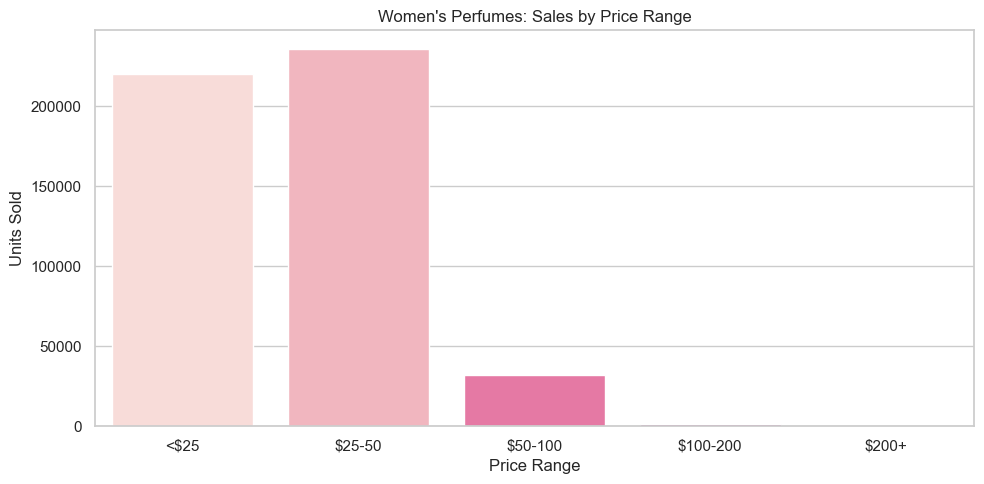

In [ ]:

# 💵 Sales by Price Range (Women)
womens_perfume_df['price_range'] = pd.cut(womens_perfume_df['price'], bins=bins, labels=labels)
womens_price_range = womens_perfume_df.groupby('price_range')['sold'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=womens_price_range, x='price_range', y='sold', palette='RdPu')
plt.title("Women's Perfumes: Sales by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

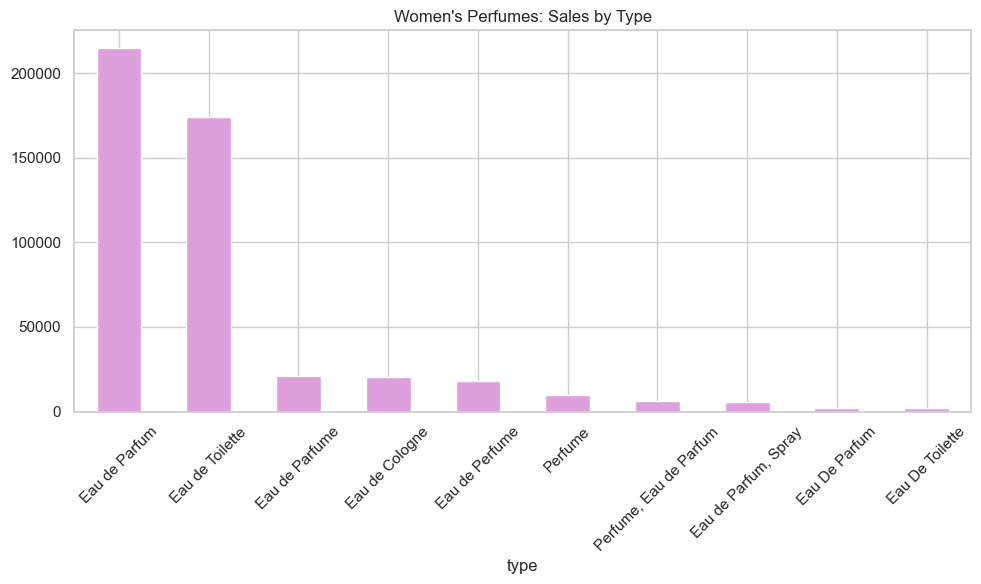

In [ ]:
# 🧴 Sales by Perfume Type (Women)
plt.figure(figsize=(10, 6))
type_sales_women = womens_perfume_df.groupby('type')['sold'].sum().sort_values(ascending=False).head(10)
type_sales_women.plot(kind='bar', title="Women's Perfumes: Sales by Type", color='plum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Top locations (women)
women_location_counts = womens_perfume_df['itemLocation'].value_counts().head(10)
print("\nTop Locations for Women's Perfumes:")
print(women_location_counts)


Top Locations for Women's Perfumes:
itemLocation
Dallas, Texas, United States             141
Hackensack, New Jersey, United States     85
Brooklyn, New York, United States         35
Miami, Florida, United States             32
Edison, New Jersey, United States         26
Detroit, Michigan, United States          25
Las Vegas, Nevada, United States          23
New York, New York, United States         19
Houston, Texas, United States             19
Warren, Michigan, United States           18
Name: count, dtype: int64
